Clone github repository for data

In [ ]:
!git clone https://github.com/ngk324/Capstone.git

Cloning into 'Capstone'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 130.53 KiB | 4.08 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Import packages and download data to be used

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

data = pd.read_excel('Capstone/Data2.xlsx')
data2 = pd.read_excel('Capstone/ExcisedData2.xlsx')

Pigdata2 = pd.read_excel('Capstone/PigData2.xlsx')
Humandata2 = pd.read_excel('Capstone/HumanData2.xlsx')

Pdf = np.asarray(Pigdata2)
Hdf = np.asarray(Humandata2)

df = np.asarray(data)
df2 = np.asarray(data2)


Plot graphs

In [ ]:
# added jitter to see overlapping points in plot
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def confusion_matrix(k_labels_matched, truth):
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(truth, k_labels_matched)

  # Plot confusion matrix
  pyplot.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      pyplot.text(j, i, z, ha='center', va='center')
  pyplot.xlabel("kmeans label")
  pyplot.ylabel("truth label")
  pyplot.show()

# plot data
def plot_freq(df2, numTotal):

  cluster1X = []
  cluster1Y = []
  cluster2X = []
  cluster2Y = []
  counter = 0

  for i in range(len(df2) - numTotal):
    if counter < 13 or (counter > 52 and counter < (numTotal-1)):
      cluster1X.append(df2[i,0])
      cluster1Y.append(df2[i,1])
      counter = counter + 1
    elif counter < 52:
      cluster2X.append(df2[i,0])
      cluster2Y.append(df2[i,1])
      counter = counter + 1
    else:
      cluster2X.append(df2[i,0])
      cluster2Y.append(df2[i,1])
      counter = 0


  cluster1X = rand_jitter(cluster1X)
  cluster1Y = rand_jitter(cluster1Y)
  cluster2Y = rand_jitter(cluster2Y)
  cluster2X = rand_jitter(cluster2X)
  pyplot.title("Plot of Pig Data")
  pyplot.xlabel("Weighted Displacement")
  pyplot.ylabel("Frequency(Hz)")
  pyplot.scatter(cluster1X[:], cluster1Y[:], color='green', alpha=0.3)
  pyplot.show()
  pyplot.title("Plot of Human Data")
  pyplot.xlabel("Weighted Displacement")
  pyplot.ylabel("Frequency(Hz)")
  pyplot.scatter(cluster2X, cluster2Y, color='red', alpha=0.1)

  pyplot.show()

def plot_freq_excised(df2, numTotal):

  cluster1X = []
  cluster1Y = []
  cluster2X = []
  cluster2Y = []
  counter = 0

  for i in range(len(df2) - numTotal):
    if counter < 11:
      cluster1X.append(df2[i,0])
      cluster1Y.append(df2[i,1])
      counter = counter + 1
    elif counter < 50:
      cluster2X.append(df2[i,0])
      cluster2Y.append(df2[i,1])
      counter = counter + 1
    else:
      cluster2X.append(df2[i,0])
      cluster2Y.append(df2[i,1])
      counter = 0


  cluster1X = rand_jitter(cluster1X)
  cluster1Y = rand_jitter(cluster1Y)
  cluster2Y = rand_jitter(cluster2Y)
  cluster2X = rand_jitter(cluster2X)
  pyplot.title("Plot of Pig Data")
  pyplot.xlabel("Weighted Displacement")
  pyplot.ylabel("Frequency(Hz)")
  pyplot.scatter(cluster1X[:], cluster1Y[:], color='green', alpha=0.3)
  pyplot.show()
  pyplot.title("Plot of Human Data")
  pyplot.xlabel("Weighted Displacement")
  pyplot.ylabel("Frequency(Hz)")
  pyplot.scatter(cluster2X, cluster2Y, color='red', alpha=0.1)

  pyplot.show()

Gaussian Mixture Model using Human Control Data and Whole Pig Eyes

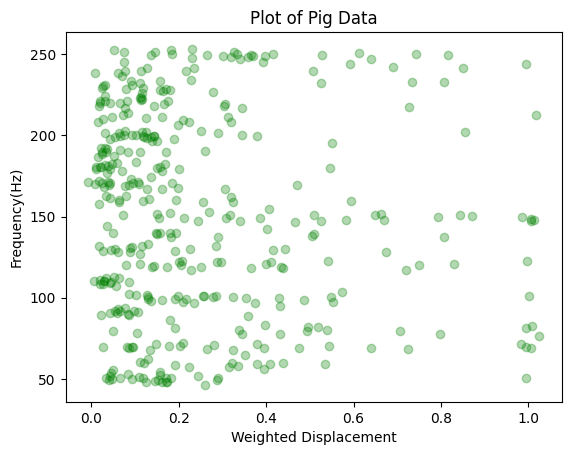

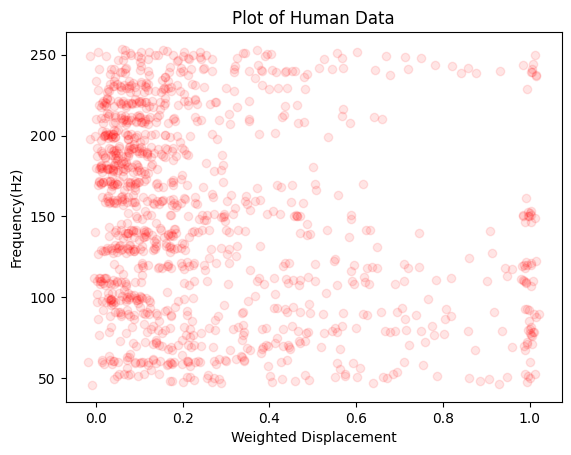


Uncertainty for 50 Hz
Pig: 33
Human: 14
[1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Uncertainty for 60 Hz
Pig: 7
Human: 21
[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0]

Uncertainty for 70 Hz
Pig: 34
Human: 25
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Uncertainty for 80 Hz
Pig: 16
Human: 8
[0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1]

Uncertainty for 90 Hz
Pig: 26
Human: 3
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1]

Uncertainty for 100 Hz
Pig: 20
Human: 3
[0

In [ ]:
numTotal = 74
numTotalPig = 34

# create 2D array of all data points and its corresponding frequency
arr=[]
rows = len(df[0,:])
cols=2
for i in range(rows):
    for k in range(len(df[:,0])):
      col = []
      for j in range(cols):
          col.append(50+(10 * i))
      arr.append(col)

for i in range(len(df[0,:])):
  for j in range(len(df[:,0])):
    arr[j+(numTotal*i)][0] = df[j][i] # 1113 is start of labels
arr = np.array(arr)

# get ground truths of human or pig
truths = list(map(int, df[:,21]))
truths = np.array(truths)

plot_freq(arr[:,:], numTotal)

# run Bayesian Gaussain Mixture model on each frequency and measure cluster prediction purity
for k in range(21):
  model = BayesianGaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
  k_labels_matched  = model.fit_predict(arr[k*numTotal:k*numTotal+numTotal,:])


  pigTotal=np.sum(k_labels_matched[0:13])
  pigTotal= pigTotal + np.sum(k_labels_matched[53:numTotal])
  #pigTotal = 16 - pigTotal
  humanTotal = np.sum(k_labels_matched[13:53])
  entPig = 0
  entHuman = 0
  if pigTotal != numTotalPig and pigTotal != 0:
    entPig = -((pigTotal/numTotalPig)*np.log2(pigTotal/numTotalPig)+((numTotalPig-pigTotal)/numTotalPig)*np.log2((numTotalPig-pigTotal)/numTotalPig))
  if humanTotal != 40 and humanTotal != 0:
    entHuman = -((humanTotal/40)*np.log2(humanTotal/40)+((40-humanTotal)/40)*np.log2((40-humanTotal)/40))
  print("\nUncertainty for", (k+5) * 10, "Hz")
 # print("Pig:", entPig)
 # print("Human:", entHuman)
  print("Pig:", pigTotal)
  print("Human:", humanTotal)
  print(k_labels_matched)
  #confusion_matrix(k_labels_matched, truths)



VBGMM with 2 combined frequencies

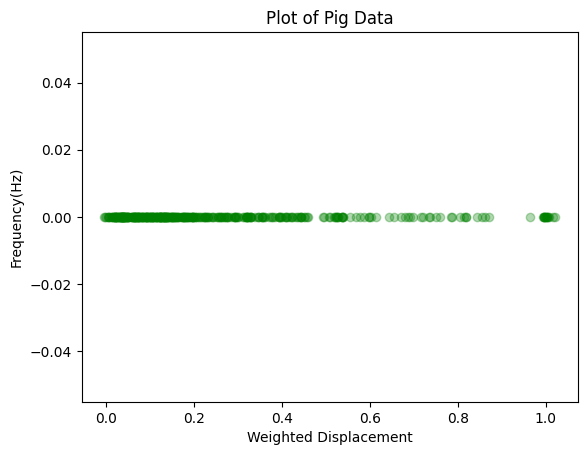

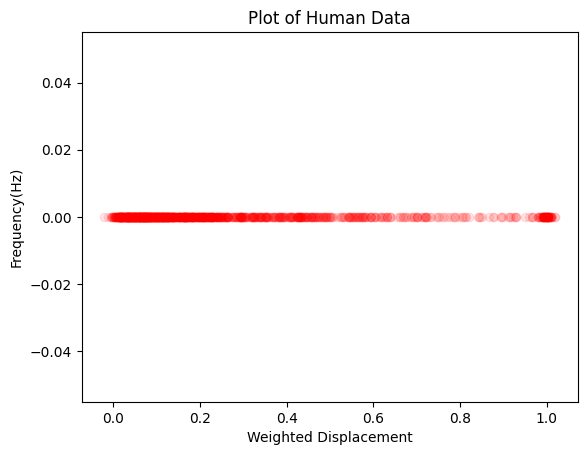


Uncertainty for 50 Hz and  60
Pig: 0.9081783472997051
Human: 1.0
[1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]

Uncertainty for 60 Hz and  70
Pig: 0.3227569588973982
Human: 0.954434002924965
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]

Uncertainty for 70 Hz and  80
Pig: 0.5834680254658802
Human: 0.8485481782946158
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 1 

In [ ]:
numTotal = 74
numTotalPig = 34

# create 2D array of all data points and its corresponding frequency
arr=[]
rows = len(df[0,:])
cols=2
for i in range(rows):
    for k in range(len(df[:,0])):
      col = []
      for j in range(cols):
          col.append(0)
      arr.append(col)

for i in range(len(df[0,:])):
  for j in range(len(df[:,0])):
    arr[j+(numTotal*i)][0] = df[j][i] # 1113 is start of labels
arr = np.array(arr)

# get ground truths of human or pig
truths = list(map(int, df[:,21]))
truths = np.array(truths)

plot_freq(arr[:,:], numTotal)

# run Bayesian Gaussain Mixture model on each frequency and measure cluster prediction purity
for k in range(20):
  model = BayesianGaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
  k_labels_matched  = model.fit_predict(arr[k*numTotal:(k+1)*numTotal+numTotal,:])


  pigTotal=np.sum(k_labels_matched[0:13])
  pigTotal= pigTotal + np.sum(k_labels_matched[53:numTotal])
  pigTotal=pigTotal + np.sum(k_labels_matched[numTotal:numTotal+13])
  humanTotal = np.sum(k_labels_matched[13:53])
  humanTotal = humanTotal + np.sum(k_labels_matched[numTotal + 13:numTotal + 53])
  entPig = 0
  entHuman = 0
  numTotalPig = numTotalPig * 2
  if pigTotal != numTotalPig and pigTotal != 0:
    entPig = -((pigTotal/numTotalPig)*np.log2(pigTotal/numTotalPig)+((numTotalPig-pigTotal)/numTotalPig)*np.log2((numTotalPig-pigTotal)/numTotalPig))
  if humanTotal != 80 and humanTotal != 0:
    entHuman = -((humanTotal/80)*np.log2(humanTotal/80)+((80-humanTotal)/80)*np.log2((80-humanTotal)/80))
  print("\nUncertainty for", (k+5) * 10, "Hz and ", (k+6) * 10)
  print("Pig:", entPig)
  print("Human:", entHuman)
  print(k_labels_matched)
  #confusion_matrix(k_labels_matched, truths)



Gaussian Mixture Model using Human Control Data and Excised Pig Cornea

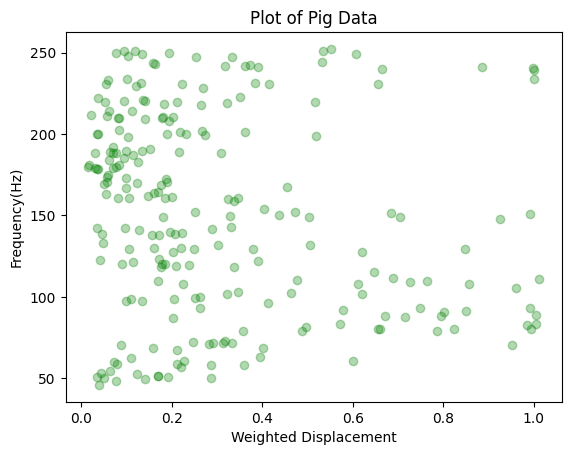

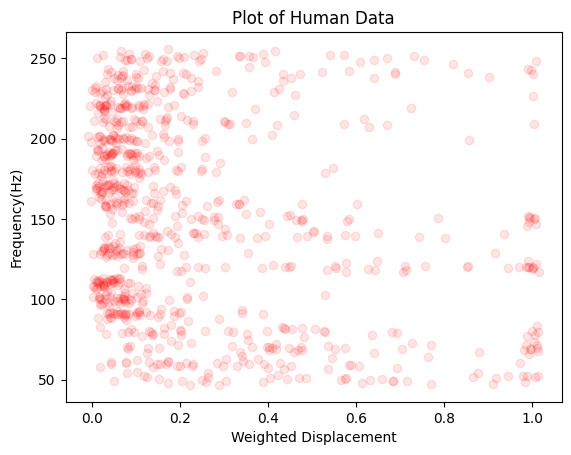


Uncertainty for 50 Hz
Pig:  1.0
Human:  0.6
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 0 1]

Uncertainty for 60 Hz
Pig:  0.7272727272727273
Human:  0.475
[0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 1]

Uncertainty for 70 Hz
Pig:  0.09090909090909091
Human:  0.65
[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0]

Uncertainty for 80 Hz
Pig:  0.6363636363636364
Human:  0.8
[1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0]

Uncertainty for 90 Hz
Pig:  0.8181818181818182
Human:  0.925
[1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Uncertainty for 100 Hz
Pig:  0.7272727272727273
Human:  0.875
[1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0]

Uncertainty for

In [ ]:
df = df2
numTotal = 51
# create 2D array of all data points and its corresponding frequency
arr=[]
rows = len(df[0,:])
cols=2
for i in range(rows):
    for k in range(len(df[:,0])):
      col = []
      for j in range(cols):
          col.append(50+(10 * i))
      arr.append(col)

for i in range(len(df[0,:])):
  for j in range(len(df[:,0])):
    arr[j+(numTotal*i)][0] = df[j][i] # 1113 is start of labels
arr = np.array(arr)

# get ground truths of human or pig
truths = list(map(int, df[:,21]))
truths = np.array(truths)

plot_freq_excised(arr[:,:], numTotal)

# run Bayesian Gaussain Mixture model on each frequency and measure cluster prediction purity
for k in range(21):
  model = BayesianGaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
  k_labels_matched  = model.fit_predict(arr[k*numTotal:k*numTotal+numTotal,:])

  pigTotal=np.sum(k_labels_matched[0:11])
  humanTotal = np.sum(k_labels_matched[11:51])
  entPig = 0
  entHuman = 0
  if pigTotal != 11 and pigTotal != 0:
    entPig = -((pigTotal/11)*np.log2(pigTotal/11)+((11-pigTotal)/11)*np.log2((11-pigTotal)/11))
  if humanTotal != 40 and humanTotal != 0:
    entHuman = -((humanTotal/40)*np.log2(humanTotal/40)+((40-humanTotal)/40)*np.log2((40-humanTotal)/40))
  print("\nUncertainty for", (k+5) * 10, "Hz")
  #print("Pig:", entPig)
  #print("Human:", entHuman)
  print("Pig: ", pigTotal/11)
  print("Human: ", (40-humanTotal)/40)
  print(k_labels_matched)
  #confusion_matrix(k_labels_matched, truths)


SVC Model

In [ ]:
from sklearn import svm


testData = pd.read_excel('Capstone/TestData2.xlsx')
trainData = pd.read_excel('Capstone/TrainData2.xlsx')

traindf = np.asarray(trainData)
testdf = np.asarray(testData)

traindf1 = traindf[:,0:21]
testdf1 = testdf[:,0:21]
truths = traindf[:,21]
truth_result = [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

arr = np.zeros((21,1000))


for j in range(1000):
  for i in range(21):
      arrTrain = np.delete(traindf1,i,1)
      arrTest = np.delete(testdf1,i,1)
      clf = svm.LinearSVC(max_iter=30, tol=1000)
      clf.fit(arrTrain,truths)
      pred = clf.predict(arrTest)
      df1 = pd.Series(truth_result)
      df2 = pd.Series(pred)
      result = df1.corr(df2)
      arr[i,j] = result

for i in range(len(arr)):
  print("\n",50 + (10*i), "Hz")
  print(np.mean(arr[i,:]))
  print(np.std(arr[i,:]))



 50 Hz
0.9922992014718628
0.03325120331132598

 60 Hz
0.99236948721205
0.030283437136139138

 70 Hz
0.9979434588343552
0.01720075453974417

 80 Hz
0.9841803085349783
0.04092474285452564

 90 Hz
0.9564999663110125
0.09002996525941903

 100 Hz
0.9887108673957853
0.03597375066300335

 110 Hz
0.9530431321626572
0.07398559050700958

 120 Hz
0.9879440855732885
0.05247973712203465

 130 Hz
0.9892143942843561
0.036408641987052494

 140 Hz
0.9872410511025176
0.04185264405665551

 150 Hz
0.9989148453429421
0.012461097047746167

 160 Hz
0.9911568538009543
0.033098898030591135

 170 Hz
0.9893080529287094
0.03561491273682154

 180 Hz
0.9901732795741247
0.03424121541368487

 190 Hz
0.9912922543408672
0.0324646299545664

 200 Hz
0.9900202159968533
0.03425059460323788

 210 Hz
0.9905352405801421
0.037568147948344115

 220 Hz
0.9874961010185058
0.037927080829691186

 230 Hz
0.9892906844884441
0.037320644062964085

 240 Hz
0.9811749958916158
0.04507921221134523

 250 Hz
0.9901400675621091
0.03606339814

k-fold CV SVC model

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import os

trainData = pd.read_excel('Capstone/Data2.xlsx', header=1)

traindf = np.asarray(trainData)
traindfX = traindf[:,0:21]
traindfY = traindf[:,21]

n_k_fold_splits = 5

arr = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cum_arr = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

array = np.zeros((21,500))

for j in range(100):
  for i in range(21):
    score = 0
    kfolds = StratifiedKFold(n_splits = n_k_fold_splits, shuffle = True)
    splits = kfolds.split(traindfX, traindfY)
    for k, (train, test) in enumerate(splits):
      arrTrainX = []
      arrTrainY = []
      arrTestX = []
      arrTestY = []

      train = traindf[train]
      test = traindf[test]

      arrTrainX = train[:,0:21]
      arrTrainY = train[:,21]

      arrTestX = test[:,0:21]
      arrTestY = test[:,21]

      arrTrainX = np.delete(arrTrainX,i,1)

      arrTestX = np.delete(arrTestX,i,1)

      clf = svm.LinearSVC(max_iter=100, tol = 0.01)

      clf.fit(arrTrainX, arrTrainY)
      pred = clf.predict(arrTestX)

      df1 = pd.Series(arrTestY)
      df2 = pd.Series(pred)
      result = df1.corr(df2)
      array[i,j*n_k_fold_splits+k] = result


for i in range(len(cum_arr)):
  print("\n",50 + (10*i), "Hz:", round(np.mean(array[i,:]),4),"+-",round(np.std(array[i,:]),4))



 50 Hz: 0.9969 +- 0.0199

 60 Hz: 0.9948 +- 0.0268

 70 Hz: 0.9896 +- 0.0413

 80 Hz: 0.9987 +- 0.0148

 90 Hz: 0.9883 +- 0.0408

 100 Hz: 0.9975 +- 0.0178

 110 Hz: 0.9216 +- 0.0963

 120 Hz: 0.9739 +- 0.0557

 130 Hz: 0.9957 +- 0.0234

 140 Hz: 0.9909 +- 0.036

 150 Hz: 0.9942 +- 0.03

 160 Hz: 0.9947 +- 0.0259

 170 Hz: 0.9979 +- 0.0188

 180 Hz: 0.9969 +- 0.0239

 190 Hz: 0.9951 +- 0.0287

 200 Hz: 0.9964 +- 0.0252

 210 Hz: 0.994 +- 0.0296

 220 Hz: 0.9959 +- 0.0239

 230 Hz: 0.9956 +- 0.0236

 240 Hz: 0.9966 +- 0.0209

 250 Hz: 0.9954 +- 0.025
